<a href="https://colab.research.google.com/github/ChakraArnab/Machine-Learning-Assignment/blob/main/Recognize_a_digit(assignment_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

Problem ->** Recognize a Digit using Machine Learning**
To solve this i will used ANN(Artificial Neural Network).
why i am using ANN? because it is simple to understand and easy to implement,althrough i can  use cnn, which is more powerful neural network than Ann but for our problem ANN is enough to get 95%+ accuracy.

In [81]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #this line of code i used to load the MNIST handwritten digit dataset from Tensorflow
#It contains 70,000 grayscale images of handwritten digits from 0 to 9. 60,000 for training and 10,000 for testing,each image is 28x28 pixels in size

In [82]:
x_train.shape # we can see that the shape (60000,28,28) represent that it is a 3d array in which there are 60000 images , 28 is the height of image and 28 is the width of the image

(60000, 28, 28)

In [83]:
y_train.shape # y_train is a 1D array in which there are 60000 elements and each elements c is a label(a number from 0 to 9) and main thing that it is map with xtrain so that we can see that which image has which label

(60000,)

In [29]:
print(x_train[0]) # it is the first image of dataset,since it is a grayscale image therefore each pixel value will be from 0 - 255

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

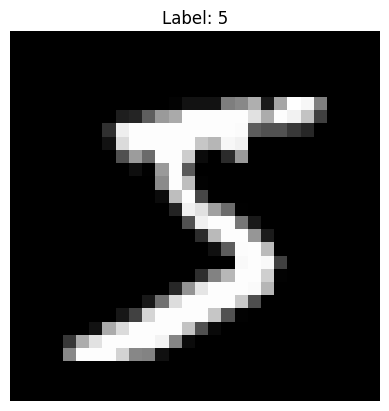

In [85]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()# this is the actual image and the label indicate that it is digit 5

since the value of each pixel is in range between 0 - 255 so it is difficult for ANN  to understand just like human brain,if we get 234.4 ,125.3...... value it is also difficult to understand ,human brain always wants small value so that it can understand fast and also it will process fast.So if we normalize this value between 0 -1 then it will easy to process fast and understand,therefore we divide both x_test and x_train by 255.0 because max value of grayscale is 255.

In [36]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [37]:
print(x_train[0]) #after normalization we can the value is range between 0-1

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Designing ANN -> **
My ANN is consist of Flatten layer , 4 Dense layer(Dense1,Dense2,Dense3,Dense4).Dense1 layer consist of 256 neurons ,Dense2 layer consist of128 neurons and a last layer Dense4 consist of 10 neurons because we have 10 labels(0-9)

why flatten is used?
Flatten is used because x_train[i] is a 2d array and Ann process only 1d vector therefore flatten is used to convert the 2d array to 1D array

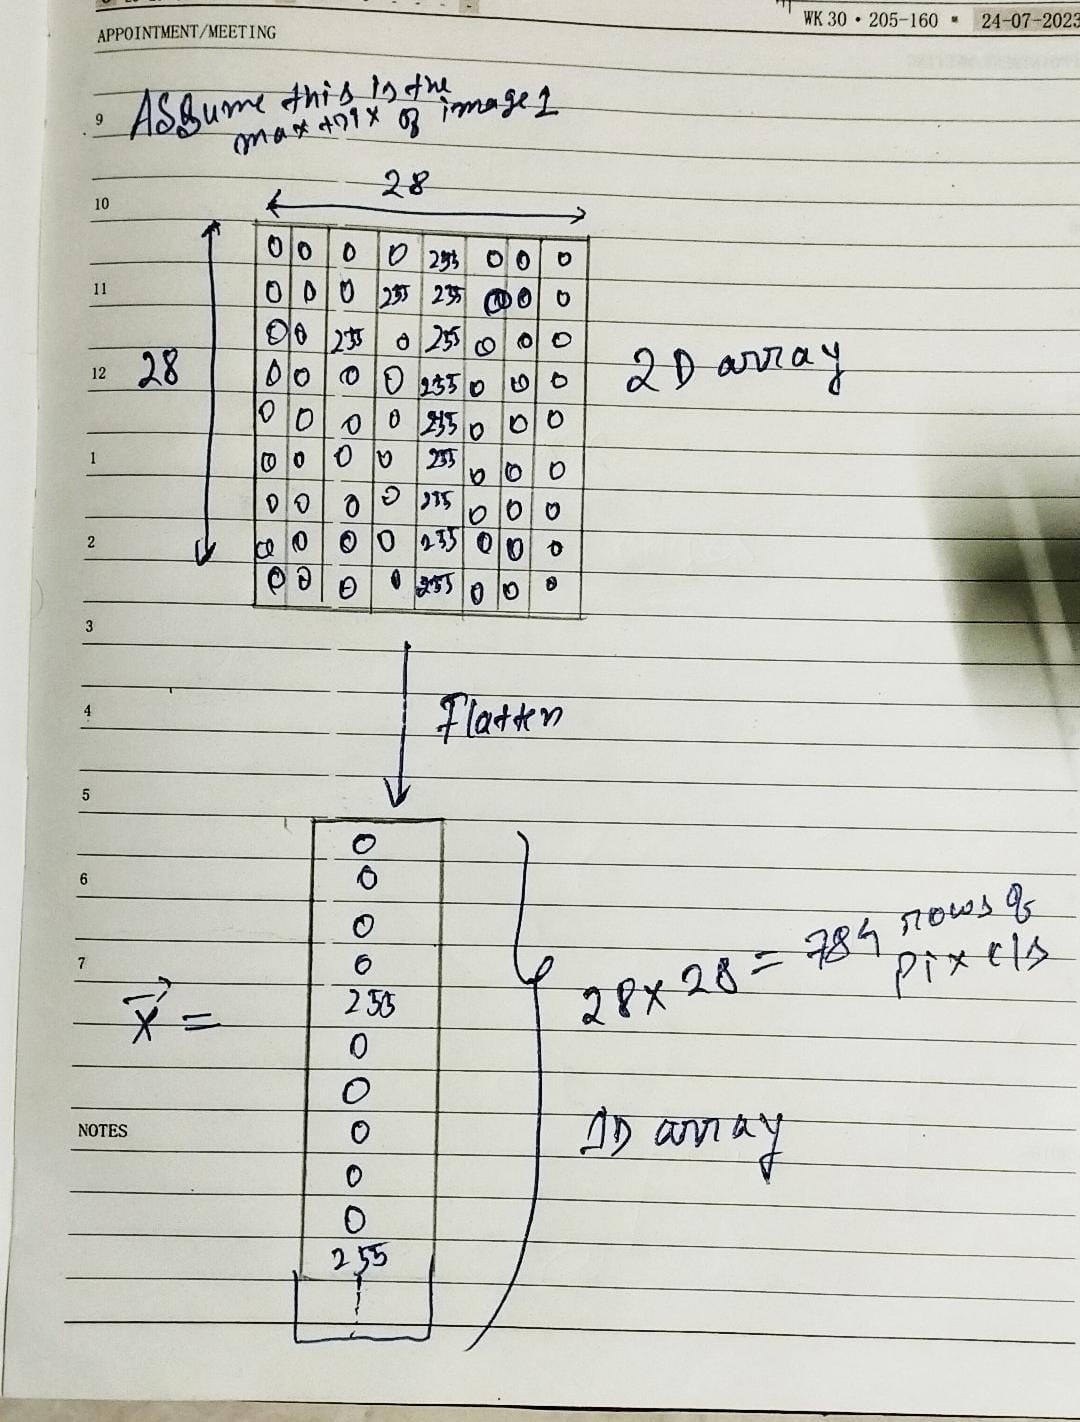


Activation function ->
activation function is used whether a neuron should activate or not
in model i used two activation function one is relu and another is softmax

Relu -> it is function which will give output the same positive value or 0 for negatives means relu= max(0,x)

softmax-> it is used in the last dense layer so that the model will find which digit it see. softmax can do this by finding the probability of the outputs and the class with the highest probability is selected as the predicted digit

In [77]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#this line is used to compile the model before training
#optimizer="adam" , optimizer is used because when a model make a mistake,the optimizer adjuct the weights to reduce the error
#adam is a optimizer algorithm which used to adjust the weight intelligently
#Loss function is a function which is used to measure how wrong the the model predictions is, it basically the the difference between the actual output and predicted output
# i used sparse_categorical_crossentropy beacuse digit recogination is  multiclass classification and target labels(0-9) are integers not vectors



In [79]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1) #epochs means at how many time model will go through entire training set ,initially i have use epochs=5 but after that i have used epochs=10 and accuracy increase but after more increase of epochs value accuracy remain same
#batch_size= 32 because at a time model will process 32 images, validation_split=0.1 means 10% of the training data is kept aside as validation data to test the model's performance during training

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8750 - loss: 0.4174 - val_accuracy: 0.9688 - val_loss: 0.1041
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9702 - loss: 0.0947 - val_accuracy: 0.9755 - val_loss: 0.0789
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9808 - loss: 0.0609 - val_accuracy: 0.9765 - val_loss: 0.0810
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9839 - loss: 0.0471 - val_accuracy: 0.9777 - val_loss: 0.0840
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9873 - loss: 0.0365 - val_accuracy: 0.9758 - val_loss: 0.0907
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9892 - loss: 0.0314 - val_accuracy: 0.9813 - val_loss: 0.0789
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9911 - loss: 0.0282 - val_accuracy: 0.9683 - val_loss: 0.1357
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9917 - loss: 0.0237 

In [80]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9776 - loss: 0.0970
Test Accuracy: 0.9811


test result -> 98.11%
althrough i added more dense layer also changed numbers of  neurons but the accuracy after changing  is 97% but with current model i got 98.11%